# **How indoor plants improve our life: phytoremediation of indoor air pollutants.**

## Air pollutants in residential environments, their dangers and limits.

The data here presented show the **common air pollution** in environments **where we** usually **live and work**, or that we generally frequent, such as our houses, offices, public places.

Three datasets were used to build this study:
- Dataset 1: different gases (**NO2, NH3, CO, O3**) and **PM2.5** levels were recorded with low-cost sensors in residential environments in the city of **Pune (India)** from November 2020 to July 2022.
- Dataset 2: **CO2, TVOC, CO**, and the particulate matter **PM2.5 and PM10** were recorded with low-cost sensors in residential and institutional buildings in **India/U.S.** during the year 2024.
- Dataset 3: within a project of the Aachen University of Applied Sciences (**Germany**), air pollutants levels (**NO2, SO2, CO, CO2, O3, PM2.5, PM10, PM1**) were recorded in a **laboratory** and in a **one-room-apartment** from March to July 2023.

The results reflect the different situation in the different parts of the world where the data come from, and the difference between a laboratory and more common indoor environments.

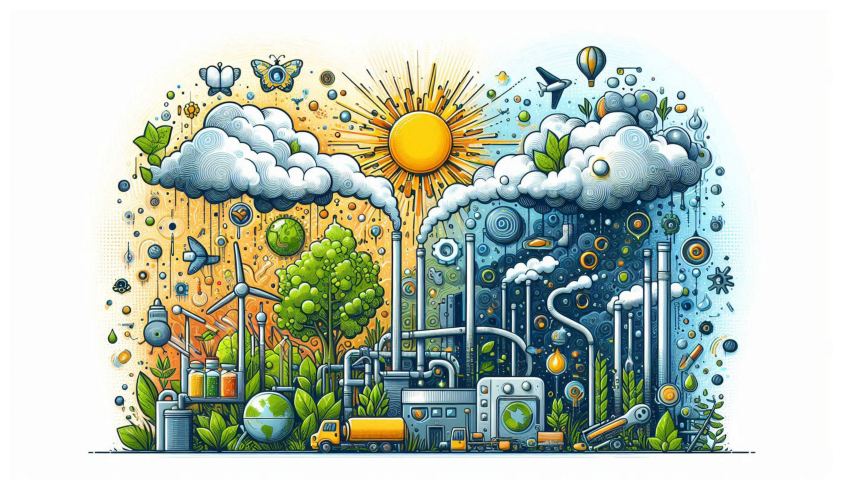

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("../images/intro.jpeg")

# make large figure and show only image
fig, ax = plt.subplots(figsize=(11, 5))  
ax.imshow(img)
ax.axis("off")  

plt.tight_layout()
plt.show()

### Dataset 1: "Dataset of Indoor Air Pollutants using Low-Cost Sensors", DOI: 10.17632/2r232jpfb2.1

Indoor air pollutant concentration data is collected for all the seasons in Pune city, India, from internet of things-based system built using low-cost sensors. The raw data contains 1,73,468 records collected from Nov 2020 to July 2022. Air pollutant PM2.5 (Particulate Matter) is measured using GP2Y1010AU0F Dust Smoke Particle Sensor, NO2 (Nitrogen Dioxide), NH3 (Ammonia) and CO (Carbon Monoxide) pollutant measured using MICS-6814 sensor. Ozone (O3) measured using MQ131 Semiconductor Sensor. Temperature, Humidity measured using BME 280 sensor. Measurement units of NH3 is PPM, NO2 in PPM, CO in PPM, PM2.5 in ug/m3, Temperature in Celsius, Pressure in hPa, Humidity in RH, Ozone in PPB. This data can be used for study and evaluations of prediction models, low-cost sensor data and calibration. It can be used for the study of the pollutant’s patterns in COVID-19 pandemic.  It will help policymakers to develop policies to monitor air pollution impact.

In [2]:
# import data file
import csv
import pandas as pd

df1_air_pollution = pd.read_csv("../data/Dataset_of_Indoor_Air_Pollutants_using_Low-Cost_Sensors/Indoor Air Pollution Data.csv", low_memory=False)

In [3]:
# delete the last 10 columns (complete columns with NaN values)
df1_air_pollution = df1_air_pollution.iloc[:, :-10]

In [4]:
# replace pipe '|' with space ' '
df1_air_pollution['Date'] = df1_air_pollution['Date'].str.replace('|', ' ', regex=False)

# convert to datetime 
df1_air_pollution['Date'] = pd.to_datetime(df1_air_pollution['Date'], errors='coerce')

# check missing dates
print(f"Missing dates after conversion: {df1_air_pollution['Date'].isna().sum()}")

# split date and time columns
df1_air_pollution['date'] = df1_air_pollution['Date'].dt.date
df1_air_pollution['time'] = df1_air_pollution['Date'].dt.time

# drop original Date column and reorder
df1_air_pollution.drop(columns=['Date'], inplace=True)
df1_air_pollution.insert(0, 'time', df1_air_pollution.pop('time'))
df1_air_pollution.insert(0, 'date', df1_air_pollution.pop('date'))


Missing dates after conversion: 4


In [5]:
# drop rows where 'date' is NaN
df_PM_removal_PM_removal1_air_pollution = df1_air_pollution.dropna(subset=['date'])

In [6]:
# modify the column names
df1_air_pollution.columns = ["date", "time", "NH3 [ppm]", "NO2 [ppm]", "CO [ppm]", "PM2.5 [ug/m3]", "Temperature [°C]", "Pressure [hPa]", "Humidity [RH]", "O3 [ppb]"]

In [7]:
# convert the columns (except date and tiem) to numeric
for col in df1_air_pollution.columns[2:]:
    df1_air_pollution[col] = pd.to_numeric(df1_air_pollution[col], errors='coerce')

In [8]:
# calculate the average of each pollutant per month (to decrease the density of the data)

# ensure the Date column is datetime
df1_air_pollution['date'] = pd.to_datetime(df1_air_pollution['date'])

# create a month column
df1_air_pollution['Month'] = df1_air_pollution['date'].dt.to_period('M')  # Gives '2025-06' format

# group by month and calculate mean of all other columns
monthly_means = df1_air_pollution.groupby('Month').mean(numeric_only=True).reset_index()


In [9]:
# convert Period to Timestamp (start of the period)
monthly_means['Month'] = monthly_means['Month'].dt.to_timestamp()
df1_monthly_means = monthly_means.reset_index(drop=True)

### Dataset 2: "IoT Indoor Air Quality", DOI: 10.34740/kaggle/dsv/11462898

This dataset presents real-time Indoor Air Quality (IAQ) data collected from multiple IoT-enabled environmental sensors deployed in a controlled indoor environment. The aim of this dataset is to support research and development in the domain of smart environmental monitoring systems, air quality classification, and health-aware AI applications.

In [10]:
df2_air_pollution = pd.read_csv("../data/IoT_Indoor_Air_Quality/IoT_Indoor_Air_Quality_Dataset.csv")

In [11]:
df2_air_pollution = df2_air_pollution.iloc[:, :-3]

In [12]:
# convert 'Timestamp' to datetime type with the correct format
df2_air_pollution['Timestamp'] = pd.to_datetime(df2_air_pollution['Timestamp'], format='%d-%m-%Y %H:%M')

# create new columns for date and time
df2_air_pollution['date'] = df2_air_pollution['Timestamp'].dt.date
df2_air_pollution['time'] = df2_air_pollution['Timestamp'].dt.time

# drop original Date column and reorder
df2_air_pollution.drop(columns=['Timestamp'], inplace=True)
df2_air_pollution.insert(0, 'time', df2_air_pollution.pop('time'))
df2_air_pollution.insert(0, 'date', df2_air_pollution.pop('date'))

In [13]:
df2_air_pollution = df2_air_pollution.dropna()

In [14]:
cols = list(df2_air_pollution.columns)  # get current column names as a list

# find the index of the column you want to rename, then assign the new name
cols[cols.index('Temperature (?C)')] = 'Temperature/°C'
cols[cols.index('PM2.5 (?g/m?)')] = 'PM2.5/µg/m3'
cols[cols.index('PM10 (?g/m?)')] = 'PM10/µg/m3'

# assign the modified list back to df.columns
df2_air_pollution.columns = cols

In [15]:
# calculate the average of each pollutant per month (to decrease the density of the data)

# ensure the Date column is datetime
df2_air_pollution['date'] = pd.to_datetime(df2_air_pollution['date'])

# create a month column 
df2_air_pollution['Month'] = df2_air_pollution['date'].dt.to_period('M')  # Gives '2025-06' format

# group by month and calculate mean of all other columns
monthly_means = df2_air_pollution.groupby('Month').mean(numeric_only=True).reset_index()

In [16]:
# convert Period to Timestamp (start of the period)
monthly_means['Month'] = monthly_means['Month'].dt.to_timestamp()
df2_monthly_means = monthly_means.reset_index(drop=True)

### Dataset 3: "2023 Indoor Air Quality Dataset"

The data was collected using an airQ sensor (science model).
The air quality data were collected for a project of the Aachen University of Applied Sciences in order to perform further analysis.

## Laboratory

In [17]:
df3_air_pollution = pd.read_csv("../data/2023_Indoor_Air_Quality_Dataset_Germany/laboratory.csv")

In [18]:
df3_air_pollution.drop(columns=['TypPS', "oxygen", "cnt0_5", "performance", "cnt5", "cnt1", "dewpt", "cnt10", "dCO2dt", "sound_max", "temperature_o2", "cnt2_5", "dHdt", "humidity_abs", "sound", "cnt0_3", "measuretime"], inplace=True)

In [19]:
df3_air_pollution.rename(columns={
    "pm10": "PM10/µg/m3",
    "co": "CO/ppm",
    "temperature": "Temperature/°C",
    "co2": "CO2/ppm",
    "so2": "SO2/µg/m3",
    "no2": "NO2/µg/m3",
    "timestamp": "timestamp",
    "pm1": "PM1/µg/m3",
    "tvoc": "TVOC/ppb",
    "pressure" : "Pressure/hPa",
    "health": "Health index",
    "o3": "O3/µg/m3",
    "humidity": "Humidity/%",
    "pm2_5": "PM2.5/µg/m3"
}, inplace=True)

In [20]:
# convert 'timestamp' to datetime type with the correct format
df3_air_pollution['timestamp'] = pd.to_datetime(df3_air_pollution['timestamp'], format="%Y-%m-%d %H:%M:%S")

# create new columns for date and time
df3_air_pollution['date'] = df3_air_pollution['timestamp'].dt.date
df3_air_pollution['time'] = df3_air_pollution['timestamp'].dt.time

# drop original Date column and reorder
df3_air_pollution.drop(columns=['timestamp'], inplace=True)
df3_air_pollution.insert(0, 'time', df3_air_pollution.pop('time'))
df3_air_pollution.insert(0, 'date', df3_air_pollution.pop('date'))

In [21]:
# calculate the average of each pollutant per month (to decrease the density of the data)

# ensure the Date column is datetime
df3_air_pollution['date'] = pd.to_datetime(df3_air_pollution['date'])

# create a month column 
df3_air_pollution['Month'] = df3_air_pollution['date'].dt.to_period('M')

# group by month and calculate mean of all other columns
monthly_means = df3_air_pollution.groupby('Month').mean(numeric_only=True).reset_index()

In [22]:
# convert Period to Timestamp (start of the period)
monthly_means['Month'] = monthly_means['Month'].dt.to_timestamp()
df3_monthly_means = monthly_means.reset_index(drop=True)

## One-room-apartment

In [23]:
df4_air_pollution = pd.read_csv("../data/2023_Indoor_Air_Quality_Dataset_Germany/one_room_apartement.csv")

In [24]:
df4_air_pollution.drop(columns=['TypPS', "oxygen", "cnt0_5", "performance", "cnt5", "cnt1", "dewpt", "cnt10", "dCO2dt", "sound_max", "temperature_o2", "cnt2_5", "dHdt", "humidity_abs", "sound", "cnt0_3", "measuretime"], inplace=True)

In [25]:
df4_air_pollution.rename(columns={
    "pm10": "PM10/µg/m3",
    "co": "CO/ppm",
    "temperature": "Temperature/°C",
    "co2": "CO2/ppm",
    "so2": "SO2/µg/m3",
    "no2": "NO2/µg/m3",
    "timestamp": "timestamp",
    "pm1": "PM1/µg/m3",
    "tvoc": "TVOC/ppb",
    "pressure" : "Pressure/hPa",
    "health": "Health index",
    "o3": "O3/µg/m3",
    "humidity": "Humidity/%",
    "pm2_5": "PM2.5/µg/m3"
}, inplace=True)

In [26]:
# convert 'timestamp' to datetime type with the correct format
df4_air_pollution['timestamp'] = pd.to_datetime(df4_air_pollution['timestamp'], format="%Y-%m-%d %H:%M:%S")

# create new columns for date and time
df4_air_pollution['date'] = df4_air_pollution['timestamp'].dt.date
df4_air_pollution['time'] = df4_air_pollution['timestamp'].dt.time

# drop original Date column and reorder
df4_air_pollution.drop(columns=['timestamp'], inplace=True)
df4_air_pollution.insert(0, 'time', df4_air_pollution.pop('time'))
df4_air_pollution.insert(0, 'date', df4_air_pollution.pop('date'))

In [27]:
# calculate the average of each pollutant per month (to decrease the density of the data)

# ensure the Date column is datetime
df4_air_pollution['date'] = pd.to_datetime(df4_air_pollution['date'])

# create a month column 
df4_air_pollution['Month'] = df4_air_pollution['date'].dt.to_period('M')  

# group by month and calculate mean of all other columns
monthly_means = df4_air_pollution.groupby('Month').mean(numeric_only=True).reset_index()

In [28]:
# convert Period to Timestamp (start of the period)
monthly_means['Month'] = monthly_means['Month'].dt.to_timestamp()
df4_monthly_means = monthly_means.reset_index(drop=True)

## Air pollutants

In [29]:
df1_monthly_means = df1_monthly_means.drop(columns=['Temperature [°C]', 'Pressure [hPa]', 'Humidity [RH]'])
df2_monthly_means = df2_monthly_means.drop(columns=['Temperature/°C', 'Humidity (%)', 'Light Intensity (lux)'])
df3_monthly_means = df3_monthly_means.drop(columns=['Temperature/°C', 'Pressure/hPa', 'Health index', 'Humidity/%'])
df4_monthly_means = df4_monthly_means.drop(columns=['Temperature/°C', 'Pressure/hPa', 'Health index', 'Humidity/%'])

In [30]:
df1_monthly_means = df1_monthly_means.rename(columns={"PM2.5 [ug/m3]": "PM2.5 [µg/m3]"})
df2_monthly_means = df2_monthly_means.rename(columns={
    "CO2 (ppm)": "CO2 [ppm]",
    "PM2.5/µg/m3": "PM2.5 [µg/m3]",
    "PM10/µg/m3": "PM10 [µg/m3]",
    "TVOC (ppb)": "TVOC [ppb]",
    "CO (ppm)": "CO [ppm]"
})
df3_monthly_means = df3_monthly_means.rename(columns={
    "PM10/µg/m3": "PM10 [µg/m3]",
    "CO/ppm": "CO [ppm]",
    "CO2/ppm": "CO2 [ppm]",
    "SO2/µg/m3": "SO2 [µg/m3]",
    "NO2/µg/m3": "NO2 [µg/m3]",
    "PM1/µg/m3": "PM1 [µg/m3]",
    "TVOC/ppb": "TVOC [ppb]",
    "O3/µg/m3": "O3 [µg/m3]",
    "PM2.5/µg/m3": "PM2.5 [µg/m3]"
})
df4_monthly_means = df4_monthly_means.rename(columns={
    "PM10/µg/m3": "PM10 [µg/m3]",
    "CO/ppm": "CO [ppm]",
    "CO2/ppm": "CO2 [ppm]",
    "SO2/µg/m3": "SO2 [µg/m3]",
    "NO2/µg/m3": "NO2 [µg/m3]",
    "PM1/µg/m3": "PM1 [µg/m3]",
    "TVOC/ppb": "TVOC [ppb]",
    "O3/µg/m3": "O3 [µg/m3]",
    "PM2.5/µg/m3": "PM2.5 [µg/m3]"
})

In [31]:
# function to convert µg/m³ to ppm (for NO2 and SO2), to ppb (for O3)
def ugm3_to_ppm(conc_ugm3, molar_mass, temp_C=25, pressure_Pa=101325):
    R = 8.314  # J/(mol·K)
    T = temp_C + 273.15  # Kelvin
    ppm = (conc_ugm3 * R * T) / (pressure_Pa * molar_mass) * 1e-3
    return ppm

def ugm3_to_ppb(conc_ugm3, molar_mass, temp_C=25, pressure_Pa=101325):
    ppm = ugm3_to_ppm(conc_ugm3, molar_mass, temp_C, pressure_Pa)
    return ppm * 1000

# convert and rename columns in df3_monthly_means
if 'NO2 [µg/m3]' in df3_monthly_means.columns:
    df3_monthly_means['NO2 [ppm]'] = ugm3_to_ppm(df3_monthly_means['NO2 [µg/m3]'], 46.01)
    df3_monthly_means.drop(columns=['NO2 [µg/m3]'], inplace=True)

if 'SO2 [µg/m3]' in df3_monthly_means.columns:
    df3_monthly_means['SO2 [ppm]'] = ugm3_to_ppm(df3_monthly_means['SO2 [µg/m3]'], 64.07)
    df3_monthly_means.drop(columns=['SO2 [µg/m3]'], inplace=True)

if 'O3 [µg/m3]' in df3_monthly_means.columns:
    df3_monthly_means['O3 [ppb]'] = ugm3_to_ppb(df3_monthly_means['O3 [µg/m3]'], 48.00)
    df3_monthly_means.drop(columns=['O3 [µg/m3]'], inplace=True)

# convert and rename columns in df4_monthly_means
if 'NO2 [µg/m3]' in df4_monthly_means.columns:
    df4_monthly_means['NO2 [ppm]'] = ugm3_to_ppm(df4_monthly_means['NO2 [µg/m3]'], 46.01)
    df4_monthly_means.drop(columns=['NO2 [µg/m3]'], inplace=True)

if 'SO2 [µg/m3]' in df4_monthly_means.columns:
    df4_monthly_means['SO2 [ppm]'] = ugm3_to_ppm(df4_monthly_means['SO2 [µg/m3]'], 64.07)
    df4_monthly_means.drop(columns=['SO2 [µg/m3]'], inplace=True)

if 'O3 [µg/m3]' in df4_monthly_means.columns:
    df4_monthly_means['O3 [ppb]'] = ugm3_to_ppb(df4_monthly_means['O3 [µg/m3]'], 48.00)
    df4_monthly_means.drop(columns=['O3 [µg/m3]'], inplace=True)

In [ ]:
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from ipywidgets import interact, Dropdown

# WHO limits in the same units as the data
who_limits = {
    'NO2 [ppm]': [0.106, 0.021],      # short-term (1h), long-term (annual)
    'SO2 [ppm]': [0.191, 0.0076],
    'NH3 [ppm]': [0.575, 0.287],
    'CO [ppm]': [26.2, 8.73],
    'CO2 [ppm]': [1000, 5000],
    'O3 [ppb]': [82, 51],
    'TVOC [ppb]': [150, 60],
    'PM2.5 [µg/m3]': [15, 5],
    'PM10 [µg/m3]': [45, 15],
    'PM1 [µg/m3]': []  # No WHO guideline
}

pollutant_info = {
    'NO2 [ppm]': (
        "Nitrogen Dioxide (NO₂):\n\n"
        "Effects on human health:\n"
        "- irritates airways, worsens asthma, and reduces lung function.\n"
        "- long-term exposure may cause respiratory diseases.\n\n"
        "Environmental effects:\n"
        "- causes ground-level ozone and acid rains.\n"
        "- contributes to eutrophication and smog formation.\n\n"
        "Sources:\n"
        "- vehicles (especially diesel), power plants, and industrial combustion.\n"
        "- gas stoves, heating devices."
    ),
    'SO2 [ppm]': (
        "Sulfur Dioxide (SO₂):\n\n"
        "Effects on human health:\n"
        "- affects the respiratory system, especially for asthmatics.\n"
        "- causes coughing, shortness of breath, and irritation.\n\n"
        "Environmental effects:\n"
        "- leads to acid rain.\n\n"
        "Sources:\n"
        "- fossil fuel combustion (coal, oil), smelting, and volcanoes."
    ),
    'NH3 [ppm]': (
        "Ammonia (NH₃):\n\n"
        "Effects on human health:\n"
        "- high concentrations irritate eyes, nose, and throat.\n"
        "- can cause serious lung damage when inhaled at high levels.\n\n"
        "Environmental effects:\n"
        "- contributes to particle formation and eutrophication.\n\n"
        "Sources:\n"
        "- agriculture (manure, fertilizers), wastewater treatment, and industry."
    ),
    'CO [ppm]': (
        "Carbon Monoxide (CO):\n\n"
        "Effects on human health:\n"
        "- prevents oxygen delivery to the body.\n"
        "- causes headaches, fatigue, and death in high concentrations.\n\n"
        "Environmental effects:\n"
        "- reacts in atmosphere, contributing to ozone formation.\n\n"
        "Sources:\n"
        "- incomplete combustion of fossil fuels (cars, stoves, fireplaces)."
    ),
    'CO2 [ppm]': (
        "Carbon Dioxide (CO₂):\n\n"
        "Effects on human health:\n"
        "- elevated indoor CO₂ may cause fatigue and poor concentration.\n\n"
        "Environmental effects:\n"
        "- major greenhouse gas.\n"
        "- causes ocean acidification.\n\n"
        "Sources:\n"
        "- fossil fuel combustion, respiration, decomposition, cement production."
    ),
    'O3 [ppb]': (
        "Ozone (O₃):\n\n"
        "Effects on human health:\n"
        "- irritates lungs, worsen asthma, decreases lung function.\n\n"
        "Environmental effects:\n"
        "- damages crops and forests.\n"
        "- reduces photosynthesis.\n\n"
        "Sources:\n"
        "- formed from NOₓ and VOCs under sunlight."
    ),
    'TVOC [ppb]': (
        "Total Volatile Organic Compounds (TVOC):\n\n"
        "Effects on human health:\n"
        "- eye, nose, and throat irritation, headaches.\n"
        "- some VOCs are carcinogenic.\n\n"
        "Environmental effects:\n"
        "- contribute to ground-level ozone and smog.\n\n"
        "Sources:\n"
        "- paints, cleaning products, glues, cosmetics, smoking, fuel use."
    ),
}

# dataset names
datasets = [df1_monthly_means, df2_monthly_means, df3_monthly_means, df4_monthly_means]
dataset_labels = ['Pune, India', 'India/U.S.', 'Aachen, Germany (lab)', 'Aachen, Germany (apartment)']
markers = ['o', 's', '^', 'd']

# pollutants grouped by unit
pollutants_by_unit = {
    'ppm': ['NO2 [ppm]', 'SO2 [ppm]', 'NH3 [ppm]', 'CO [ppm]', 'CO2 [ppm]'],
    'ppb': ['O3 [ppb]', 'TVOC [ppb]'],
    'µg/m3': ['PM2.5 [µg/m3]', 'PM10 [µg/m3]', 'PM1 [µg/m3]']
}

# special pollutant groups
special_options = ['All PMs', 'Greenhouse Gases', 'Respiratory Irritants']
all_pollutants = sum(pollutants_by_unit.values(), []) + special_options  # list of options for the dropdown

# plotting function
def plot_pollutant(pollutant):
    fig = plt.figure(figsize=(18, 6))
    gs = fig.add_gridspec(1, 2, width_ratios=[4, 1])
    ax = fig.add_subplot(gs[0])
    info_ax = fig.add_subplot(gs[1])
    info_ax.axis('off')

    cmap = plt.colormaps.get_cmap('tab10')  #color-code lines based on dataset
    info_text = ""

    if pollutant == 'All PMs':
        pm_pollutants = ['PM1 [µg/m3]', 'PM2.5 [µg/m3]', 'PM10 [µg/m3]']
        info_text = (
            "Particulate Matter (PM1, PM2.5, PM10):\n\n"
            "Penetrate deep into the lungs (especially PM1 and PM2.5).\n\n"
            "Effects on human health:\n"
            "- can cause respiratory and cardiovascular diseases\n"
            "- can aggravate asthma.\n\n"
            "Environmental effects:\n"
            "- block photosynthesis in plants\n"
            "- alter pH of soil and water\n"
            "- affect visibility\n"
            "- carry heavy metals and organic pollutants.\n\n"
            "Sources:\n"
            "- cooking (frying, grilling)\n"
            "- burning of fossil fuels and wastes\n"
            "- various industrial processes such as mining, cooling towers, oil refining\n"
            "- construction/renovation activities and roadworks."
        )
        for pm in pm_pollutants:
            for i, df in enumerate(datasets):
                if pm in df.columns:
                    ax.plot(df['Month'], df[pm], marker=markers[i], label=f'{dataset_labels[i]} - {pm}', color=cmap(pm_pollutants.index(pm)))
        ax.set_ylabel('Concentration [µg/m³]')
        ax.set_title('Monthly Averages - All PM Types')

    elif pollutant == 'Greenhouse Gases':
        gases = ['CO [ppm]', 'CO2 [ppm]']
        info_text = (
            "Greenhouse Gases (CO, CO2):\n\n"
            "Effects on human health:\n"
            "CO is a toxic gas that can cause headaches and dizziness at high concentrations.\n\n"
            "Environmental effects:\n"
            "CO2 keeps the planet warm enough to support life. Since the Industrial Revolution (1760), "
            "atmospheric CO2 levels have doubled, causing:\n"
            "- extreme events (storms, droughts, heatwaves)\n"
            "- melting of glaciers and sea level rise\n"
            "- rising of global temperatures.\n\n"
            "CO can lead to the formation of O3 (GG), and reduces the abundance of OH radicals in the atmosphere. "
            "Therefore, CO indirectly increases the Global Warming Potential of other greenhouse gases. \n\n"
            "Sources:\n"
            "- CO from incomplete combustion of carbon-based compounds (fuels, fireplaces, wood stoves, wildfires, volcanic eruptions).\n"
            "- CO2 from combustion of fossil fuels, cement production, deforestation, soil and organisms respiration, oceanic release, decomposition of organic matter, volcanic eruptions."
        )
        for gas in gases:
            for i, df in enumerate(datasets):
                if gas in df.columns:
                    ax.plot(df['Month'], df[gas], marker=markers[i], label=f'{dataset_labels[i]} - {gas}', color=cmap(gases.index(gas)))
        ax.set_ylabel('Concentration [ppm]')
        ax.set_title('Monthly Averages - CO and CO₂')

    elif pollutant == 'Respiratory Irritants':
        irritants = ['NO2 [ppm]', 'SO2 [ppm]', 'NH3 [ppm]']
        info_text = (
            "Respiratory Irritants (NO2, SO2, NH3):\n\n"
            "Effects on human health:\n"
            "- inflammation and irritation of the airways\n"
            "- worsening of asthma\n"
            "- reducing lung function\n"
            "- high concentrations cause shortness of breath, coughing, bronchospasm, and dizziness. \n\n"
            "Environmental effects:\n"
            "- contribute to the formation of smog and acid rain\n"
            "- cause eutrophication of water bodies.\n\n"
            "Sources:\n"
            "- combustion of fossil fuels\n"
            "- residential heating (cooking, fireplaces)\n"
            "- agricultural soil emissions (from fertilization and livestock wastes)\n"
            "- industrial processes (chemical production, refrigeration systems)\n"
            "- natural sources, such as volcanic eruptions, decomposition of organic matter."
        )
        for gas in irritants:
            for i, df in enumerate(datasets):
                if gas in df.columns:
                    ax.plot(df['Month'], df[gas], marker=markers[i], label=f'{dataset_labels[i]} - {gas}', color=cmap(irritants.index(gas)))
        ax.set_ylabel('Concentration [ppm]')
        ax.set_title('Monthly Averages - Respiratory Irritants')

    else:  # to handle individual pollutants
        info_text = pollutant_info.get(pollutant, f"{pollutant} over time.\nCompare monthly values from 4 datasets.\n")
        for i, df in enumerate(datasets):
            if pollutant in df.columns:
                ax.plot(df['Month'], df[pollutant], marker=markers[i], label=f'{dataset_labels[i]}', color=cmap(i))

        # add WHO guideline lines
        if pollutant in who_limits and who_limits[pollutant]:
            limits = who_limits[pollutant]
            colors = ['red', 'orange']
            labels = ['WHO short-term limit', 'WHO long-term (annual) limit']
            for i, val in enumerate(limits):
                ax.axhline(y=val, color=colors[i], linestyle='--', label=f'{labels[i]} ({val} {pollutant[pollutant.find("[")+1:-1]})')

        unit = pollutant[pollutant.find('[')+1 : pollutant.find(']')]
        ax.set_ylabel(f'Concentration [{unit}]')
        ax.set_title(f'Monthly Averages - {pollutant}')

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))  # x-axis as month-year
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # 1 tick per month
    ax.grid(True, axis='both', linestyle='--', alpha=0.7)

    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))  # anchor the legend outside the plot
    info_ax.text(0, 1, info_text, ha='left', va='top', fontsize=10, wrap=True)
    info_ax.axis('off')

    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

    plt.tight_layout()
    plt.show()

interact(plot_pollutant,
         pollutant=Dropdown(
             options=all_pollutants,
             value='Greenhouse Gases',
             description='Pollutant:',
             layout={'width': '50%'}
         ));

## Phytoremediation of air pollutants - two studies.

Here two studies are presented, where the removal of the air pollutants **PM, formaldehyde (VOC), and NO2** was tested using a few plant species, such as snake plant, spider plant, peace lily, and so on. The studies were conducted in both a residential environment and under controlled conditions in a lab. In particular:

- Study 1: conducted in **India**. **PM and formaldehyde** levels were recorded for **four weeks in six rooms**. One room was used as control, while in each one of the other five rooms, a **unique plant species** was placed. Each week one plant was added to the room, so that after 28 days there were four plants in each room. The plants used were the **spider plant, rubber plant, bamboo plant, snake plant, and boston fern**.
- Study 2: conducted in **Birmingham (UK)**. **NO2** levels were recorded in a controlled **lab** environment. Here the plants were placed into a chamber with 100 ppb of NO2 and the absoprtion of this gas was recorded for **one hour**. The plants were exposed to **three different combinations of light and moisture**. The plants used were the **corn plant, peace lily, and ZZ plant**.

The studies were successful in confirming the indoor depuration power of those plants.

### Removal of air pollutants (PM)

In [ ]:
df_PM_removal = pd.read_excel("../data/PM_plant_removal.xlsx")

In [ ]:
# define the columns to keep
cols_to_keep = ['No. Plants', 'Day']

# find all columns ending with '_A' to keep (including Control room_A)
percent_cols = [col for col in df_PM_removal.columns if col.endswith('_A')]

# combine
cols_to_keep.extend(percent_cols)

# create a new dataframe with only those columns
df_PM_removal = df_PM_removal[cols_to_keep]

# rename columns to remove '_C' suffix
df_PM_removal.columns = [col.replace('_A', ' [µm/m3]') for col in df_PM_removal.columns]

# convert to numeric, coercing errors to NaN
df_PM_removal = df_PM_removal.apply(pd.to_numeric, errors='coerce')

In [ ]:
# sort and reset the Day index to be sequential
df_sorted = df_PM_removal.sort_values(by="Day").copy()
df_sorted["Day"] = range(1, len(df_sorted) + 1)  # ensures days go 1,2,...28

control_col = "Control room [µm/m3]"

# identify plant columns (exclude metadata and control)
plant_cols = [col for col in df_sorted.columns if col not in ["No. Plants", "Day", "Week", control_col]]

# calculate difference: plant PM - control PM (day-wise)
diff_df = df_sorted[plant_cols].subtract(df_sorted[control_col], axis=0)

# sum of differences per plant (over all days)
sum_diff_per_plant = diff_df.sum(axis=0)

# total PM in control room over all days
total_control_pm = df_sorted[control_col].sum()

# calculate percent decrease (make negative differences positive)
percent_decrease_per_plant = (-sum_diff_per_plant / total_control_pm) * 100

print(percent_decrease_per_plant)

In [ ]:
import matplotlib.gridspec as gridspec
import ipywidgets as widgets
from IPython.display import display

# sort data by Day
df_sorted = df_PM_removal.sort_values(by="Day").copy()
df_sorted["Day"] = range(1, len(df_sorted) + 1)

control_col = "Control room [µm/m3]"
plant_cols = [col for col in df_sorted.columns if col not in ["No. Plants", "Day", "Week", control_col]]

# calculate differences for later percentage display
diff_df = df_sorted[plant_cols].subtract(df_sorted[control_col], axis=0)
total_control_pm = df_sorted[control_col].sum()

# calculate fixed summary values
pm_day1 = df_sorted.loc[df_sorted["Day"] == 1, control_col].values[0]
pm_day28 = df_sorted.loc[df_sorted["Day"] == 28, control_col].values[0]
percent_increase_control = ((pm_day28 - pm_day1) / pm_day1) * 100

sum_diff_per_plant = diff_df.sum(axis=0)
total_absorption = (-sum_diff_per_plant / total_control_pm) * 100

# prepare fixed summary text
fixed_summary_text = (
    f"Control room PM change (Day 1 to 28): {percent_increase_control:.2f}%\n\n"
    "Total PM absorption by plants:\n"
)
for plant, total_abs in total_absorption.items():
    fixed_summary_text += f"  {plant.replace(' [%]', '')}: {total_abs:.2f}%\n"

# set up color mapping from original plot
fig_temp, ax_temp = plt.subplots()
line_colors = {}

for col in df_sorted.columns:
    if col in ["No. Plants", "Day", "Week"]:
        continue
    line = ax_temp.plot(df_sorted["Day"], df_sorted[col], label=col)[0]
    line_colors[col] = line.get_color()

plt.close(fig_temp)  # we just needed the colors

# create interactive widget
week_slider = widgets.IntSlider(value=1, min=1, max=4, step=1, description='Week')
output = widgets.Output()

def plot_with_week_line(week):
    output.clear_output()
    with output:
        fig = plt.figure(figsize=(20, 6))
        spec = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[6, 1])
        ax = fig.add_subplot(spec[0])

        # plot all plant and control lines with saved colors
        for col in plant_cols + [control_col]:
            ax.plot(
                df_sorted["Day"], 
                df_sorted[col], 
                marker='o', 
                label=col.replace(" [%]", ""),
                color=line_colors[col]
            )

        ax.axvline(x=week * 7, color='red', linestyle='--', label=f'Week {week} divider')
        ax.set_xlabel("Day")
        ax.set_ylabel("PM concentration (µm/m³)")
        ax.set_title("PM concentration over 28 Days")
        ax.set_xticks(range(1, 29))
        ax.grid(True)

        # create side panel with legend and combined text
        ax_legend = fig.add_subplot(spec[1])
        ax_legend.axis("off")

        handles, labels = ax.get_legend_handles_labels()
        ax_legend.legend(handles, labels, loc='upper left', bbox_to_anchor=(0, 1))

        # calculate week-specific removal values
        start_day = (week - 1) * 7
        end_day = start_day + 7
        selected_diff = diff_df.iloc[start_day:end_day]
        week_total_removal = (-selected_diff.sum() / total_control_pm) * 100

        # map: week number -> number of plants
        num_plants = week  # 1 plant added per week

        # compose dynamic weekly text
        dynamic_text = f"PM removal in Week {week} ({num_plants} plant{'s' if num_plants > 1 else ''}):\n\n"
        for plant, removal in week_total_removal.items():
            dynamic_text += f"  {plant.replace(' [%]', '')}: {removal:.2f}%\n"

        # combine fixed summary and dynamic weekly text
        combined_text = fixed_summary_text + "\n" + dynamic_text

        ax_legend.text(
            0.05, 0.4,
            combined_text,
            fontsize=10,
            va='top',
            ha='left',
            wrap=True,
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
        )

        plt.subplots_adjust(wspace=0.05)
        plt.show()

# display widget
widgets.interact(plot_with_week_line, week=week_slider)
display(output)

### Removal or air pollutants (formaldehyde, example of VOC)

In [ ]:
df_fm_removal = pd.read_excel("../data/formaldeide_plant_removal.xlsx")

In [ ]:
# rename columns
df_fm_removal.columns = [col.replace('_A', ' [mg/m3]') for col in df_fm_removal.columns]

# convert to numeric, coercing errors to NaN
df_fm_removal = df_fm_removal.apply(pd.to_numeric, errors='coerce')

In [ ]:
# sort and reset the Day index to be sequential
df_sorted = df_fm_removal.sort_values(by="Day").copy()
df_sorted["Day"] = range(1, len(df_sorted) + 1)  # ensures days go 1,2,...28

control_col = "Control room [mg/m3]"

# identify plant columns (exclude metadata and control)
plant_cols = [col for col in df_sorted.columns if col not in ["No. Plants", "Day", "Week", control_col]]

# calculate difference: plant fm - control fm (day-wise)
diff_df = df_sorted[plant_cols].subtract(df_sorted[control_col], axis=0)

# sum of differences per plant (over all days)
sum_diff_per_plant = diff_df.sum(axis=0)

# total fm in control room over all days
total_control_pm = df_sorted[control_col].sum()

# calculate percent decrease (make negative differences positive)
percent_decrease_per_plant = (-sum_diff_per_plant / total_control_pm) * 100

print(percent_decrease_per_plant)

In [ ]:
# sort data by Day
df_sorted = df_fm_removal.sort_values(by="Day").copy()
df_sorted["Day"] = range(1, len(df_sorted) + 1)

control_col = "Control room [mg/m3]"
plant_cols = [col for col in df_sorted.columns if col not in ["No. Plants", "Day", "Week", control_col]]

# calculate differences for later percentage display
diff_df = df_sorted[plant_cols].subtract(df_sorted[control_col], axis=0)
total_control_pm = df_sorted[control_col].sum()

# calculate fixed summary values
pm_day1 = df_sorted.loc[df_sorted["Day"] == 1, control_col].values[0]
pm_day28 = df_sorted.loc[df_sorted["Day"] == 28, control_col].values[0]
percent_increase_control = ((pm_day28 - pm_day1) / pm_day1) * 100

sum_diff_per_plant = diff_df.sum(axis=0)
total_absorption = (-sum_diff_per_plant / total_control_pm) * 100

# prepare fixed summary text
fixed_summary_text = (
    f"Control room formaldehyde change (Day 1 to 28): {percent_increase_control:.2f}%\n\n"
    "Total formaldehyde absorption by plants:\n"
)
for plant, total_abs in total_absorption.items():
    fixed_summary_text += f"  {plant.replace(' [%]', '')}: {total_abs:.2f}%\n"

# set up color mapping from original plot
fig_temp, ax_temp = plt.subplots()
line_colors = {}

for col in df_sorted.columns:
    if col in ["No. Plants", "Day", "Week"]:
        continue
    line = ax_temp.plot(df_sorted["Day"], df_sorted[col], label=col)[0]
    line_colors[col] = line.get_color()

plt.close(fig_temp)  # we just needed the colors

# create interactive widget
week_slider = widgets.IntSlider(value=1, min=1, max=4, step=1, description='Week')
output = widgets.Output()

def plot_with_week_line(week):
    output.clear_output()
    with output:
        fig = plt.figure(figsize=(20, 6))
        spec = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[6, 1])
        ax = fig.add_subplot(spec[0])

        # plot all plant and control lines with saved colors
        for col in plant_cols + [control_col]:
            ax.plot(
                df_sorted["Day"],
                df_sorted[col],
                marker='o',
                label=col.replace(" [%]", ""),
                color=line_colors[col]
            )

        ax.axvline(x=week * 7, color='red', linestyle='--', label=f'Week {week} divider')
        ax.set_xlabel("Day")
        ax.set_ylabel("Formaldehyde concentration (mg/m³)")
        ax.set_title("Formaldehyde concentration over 28 Days")
        ax.set_xticks(range(1, 29))
        ax.grid(True)

        # side panel with legend and combined text
        ax_legend = fig.add_subplot(spec[1])
        ax_legend.axis("off")

        handles, labels = ax.get_legend_handles_labels()
        ax_legend.legend(handles, labels, loc='upper left', bbox_to_anchor=(0, 1))

        # calculate week-specific removal
        start_day = (week - 1) * 7
        end_day = start_day + 7
        selected_diff = diff_df.iloc[start_day:end_day]
        week_total_removal = (-selected_diff.sum() / total_control_pm) * 100

        # map: week number -> number of plants
        num_plants = week  # 1 plant added per week

        # compose dynamic weekly text
        dynamic_text = f"Formaldehyde removal in Week {week} ({num_plants} plant{'s' if num_plants > 1 else ''}):\n\n"
        for plant, removal in week_total_removal.items():
            dynamic_text += f"  {plant.replace(' [%]', '')}: {removal:.2f}%\n"

        # combine fixed summary and dynamic weekly text
        combined_text = fixed_summary_text + "\n" + dynamic_text

        ax_legend.text(
            0.05, 0.4,
            combined_text,
            fontsize=10,
            va='top',
            ha='left',
            wrap=True,
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
        )

        plt.subplots_adjust(wspace=0.05)
        plt.show()

# display widget
widgets.interact(plot_with_week_line, week=week_slider)
display(output)

In [ ]:
import os

# file names in order
filenames = [
    "spider_plant.jpg",
    "rubber_plant.jpg",
    "bamboo_plant.jpg",
    "snake_plant.jpg",
    "boston_fern.jpg"
]

# common and scientific names
names = [
    ("Spider Plant", "Chlorophytum comosum"),
    ("Rubber Plant", "Ficus elastica"),
    ("Bamboo Plant", "Bambusoideae spp."),
    ("Snake Plant", "Sansevieria trifasciata"),
    ("Boston Fern", "Nephrolepis exaltata")
]

# load images
folder = "../images"
images = [Image.open(os.path.join(folder, fname)) for fname in filenames]

# create figure with gridspec: 2 rows, 5 columns
fig = plt.figure(figsize=(16, 9))
gs = gridspec.GridSpec(2, 3, figure=fig)

# columns for top row images (3 images)
top_cols = [0, 1, 2]

# columns for bottom row images (2 images), centered in columns 0 and 2
bottom_cols = [0, 1]

# plot top row images with titles
for img, col, (common, sci) in zip(images[:3], top_cols, names[:3]):
    ax = fig.add_subplot(gs[0, col])
    ax.imshow(img)
    ax.set_title(f"{common}\n" + r"$\it{{({0}\ {1})}}$".format(*sci.split()), fontsize=14)

    ax.axis('off')

# plot bottom row images with titles
for img, col, (common, sci) in zip(images[3:], bottom_cols, names[3:]):
    ax = fig.add_subplot(gs[1, col])
    ax.imshow(img)
    ax.set_title(f"{common}\n" + r"$\it{{({0}\ {1})}}$".format(*sci.split()), fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()

## NO2 removal

In [ ]:
df_NO2_removal = pd.read_excel("../data/NO2_plant_removal.xlsx")

In [ ]:
df = df_NO2_removal.copy()
labels = df["Plant"]
n_plants = len(labels)
conditions = ["No light, wet conditions", "Light, wet conditions", "Light, dry conditions"]
colors = ["#AEC6CF", "#FFB347", "#77DD77"]  # pastel blue, orange, green

# map scientific names to common names (only for plot and text)
common_names_map = {
    "Dracaena fragrans": "Corn Plant",
    "Spathiphyllum wallisii ‘Verdi’": "Peace Lily",
    "Zamioculcas zamiifolia": "ZZ Plant"
}
labels_common = [common_names_map.get(name, name) for name in labels]

x = np.arange(n_plants)
bar_width = 0.18  # keep bars narrow to allow spacing

# add spacing between bars within each group by increasing bar gap
bar_spacing = 0.05

# positions for bars within each group, adding spacing
positions = [
    x - bar_width - bar_spacing,  # first bar left shifted
    x,                           # second bar center
    x + bar_width + bar_spacing   # third bar right shifted
]

fig = plt.figure(figsize=(16, 6))
spec = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[4, 1])

ax = fig.add_subplot(spec[0])

# plot bars with error bars, spaced nicely within each group
ax.bar(positions[0], df["No wet [ppb/h]"], bar_width, yerr=df["No wet_sd [ppb/h]"], label="No light, wet conditions", color=colors[0], capsize=5)
ax.bar(positions[1], df["Typical wet [ppb/h]"], bar_width, yerr=df["Typical wet_sd [ppb/h]"], label="Light, wet conditions", color=colors[1], capsize=5)
ax.bar(positions[2], df["Typical dry [ppb/h]"], bar_width, yerr=df["Typical dry_sd [ppb/h]"], label="Light, dry conditions", color=colors[2], capsize=5)

# x ticks are centered at the middle bar position (positions[1])
ax.set_xticks(x)
ax.set_xticklabels(labels_common, ha='center')

ax.set_ylabel("NO₂ removal [ppb/h]")
ax.set_title("NO₂ Removal by Plant and Condition")
ax.legend()

ax.grid(axis='y', linestyle='--', alpha=0.7)

# text box on right, no box edge, white transparent background
text_lines = ["NO₂ Removal per Plant (ppb/h):\n"]
for idx, plant in enumerate(labels_common):
    text_lines.append(f"{plant}:")
    text_lines.append(f"  No light, wet conditions: {df.loc[idx, 'No wet [ppb/h]']:.1f} ± {df.loc[idx, 'No wet_sd [ppb/h]']:.1f}")
    text_lines.append(f"  Light, wet conditions: {df.loc[idx, 'Typical wet [ppb/h]']:.1f} ± {df.loc[idx, 'Typical wet_sd [ppb/h]']:.1f}")
    text_lines.append(f"  Light, dry conditions: {df.loc[idx, 'Typical dry [ppb/h]']:.1f} ± {df.loc[idx, 'Typical dry_sd [ppb/h]']:.1f}")
    text_lines.append("")

text_str = "\n".join(text_lines)

ax_text = fig.add_subplot(spec[1])
ax_text.axis("off")
ax_text.text(
    0, 1, text_str,
    fontsize=11,
    va='top',
    ha='left',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
)

plt.tight_layout()
plt.show()

In [ ]:
# file names in order
filenames = [
    "corn_plant.jpg",
    "peace_lily.jpg",
    "ZZ_plant.jpg"
]

# common and scientific names
names = [
    ("Corn Plant", "Dracaena fragrans"),
    ("Peace Lily", "Spathiphyllum wallisii ‘Verdi’"),
    ("ZZ Plant", "Zamioculcas zamiifolia")
]

# load images
folder = "../images"
images = [Image.open(os.path.join(folder, fname)) for fname in filenames]

# create figure with gridspec: 1 row, 3 columns
fig = plt.figure(figsize=(16, 9))
gs = gridspec.GridSpec(1, 3, figure=fig)

# columns for row images (3 images)
top_cols = [0, 1, 2]

# plot row images with titles
for img, col, (common, sci) in zip(images[:3], top_cols, names[:3]):
    ax = fig.add_subplot(gs[0, col])
    ax.imshow(img)
    ax.set_title(f"{common}\n" + r"$\it{{({0}\ {1})}}$".format(*sci.split()), fontsize=14)

    ax.axis('off')

plt.tight_layout()
plt.show()

## There is a multitude of plants that absorb or collect indoor pollutants

In [ ]:
import textwrap

# file names
filenames = [
    "../images/areca_palm.jpg", "../images/english_ivy.jpg", "../images/golden_pothos.jpg", "../images/aloe_vera.jpg",
    "../images/chinese_evergreen.jpg", "../images/weeping_fig.jpg", "../images/philodendron.jpg", "../images/dumb_cane.jpeg",
    "../images/white_bird_of_paradise.jpg", "../images/swiss_cheese_plant.jpg",
    "../images/swiss_cheese_plant_variegated.jpg", "../images/swiss_cheese_plant_thai.jpg"
]

# names (common, scientific)
names = [
    ("Areca Palm", "Dypsis lutescens"),
    ("English Ivy", "Hedera helix"),
    ("Golden Pothos", "Epipremnum aureum"),
    ("Aloe Vera", "Aloe barbadensis miller"),
    ("Chinese Evergreen", "Aglaonema commutatum"),
    ("Weeping Fig", "Ficus benjamina"),
    ("Philodendron", "Philodendron spp."),
    ("Dumb Cane", "Dieffenbachia spp."),
    ("White Bird of Paradise", "Strelitzia nicolai"),
    ("Swiss Cheese Plant", "Monstera deliciosa"),
    ("Swiss Cheese Plant", "Monstera deliciosa 'Variegata'"),
    ("Swiss Cheese Plant", "Monstera Thai Constellation")
]

# pollutants removed
pollutants = [
    "Removes: Formaldehyde, Xylene, Toluene, PM, NO2",
    "Removes: Benzene, Formaldehyde, Mold spores, PM, NO2",
    "Removes: Formaldehyde, Benzene, Xylene, Toluene, PM, O3",
    "Removes: Formaldehyde, Benzene, Xylene, Toluene, SO2, O3",
    "Removes: Formaldehyde, Benzene, Xylene, Toluene",
    "Removes: Formaldehyde, Benzene, Trichloroethylene, PM",
    "Removes: Formaldehyde, VOCs",
    "Removes: Formaldehyde, VOCs",
    "Removes: PM",
    "Removes: PM",
    "Removes: PM",
    "Removes: PM"
]

# load images
folder = "../images"
images = [Image.open(os.path.join(folder, fname)) for fname in filenames]

# create 3x4 grid
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(3, 4, figure=fig)

# plot all 12 images with wrapped text
for idx, (img, (common, sci), gases) in enumerate(zip(images, names, pollutants)):
    row = idx // 4
    col = idx % 4
    ax = fig.add_subplot(gs[row, col])
    ax.imshow(img)

    # wrap pollutant text to 40 characters per line
    wrapped_pollutants = "\n".join(textwrap.wrap(gases, width=40))

    ax.set_title(
        f"{common}\n" +
        r"$\it{{({0}\ {1})}}$".format(*sci.split()) +
        f"\n{wrapped_pollutants}",
        fontsize=10,
        pad=10
    )
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# load image
img = Image.open("../images/jungle.jpg")

plt.figure(figsize=(14, 12))
plt.imshow(img)
plt.axis('off')
plt.show()